<a href="https://colab.research.google.com/github/ibonetc/ML_Doct_MSc/blob/main/Regression_Serie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos básicos de regresión para predicción en series de tiempo
## Solución usando un redes neuronales

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [35]:
url='https://github.com/jbrownlee/Datasets/blob/d20fcb6402ae34e653d4513b00f39257bb37ed7f/monthly-car-sales.csv?raw=true'
serie = pd.read_csv(url, header=0,index_col=0)

In [36]:
serie

,Sales
Month,
1960-01,6550
1960-02,8728
1960-03,12026
1960-04,14395
1960-05,14587
...,...
1968-08,16722
1968-09,14385
1968-10,21342


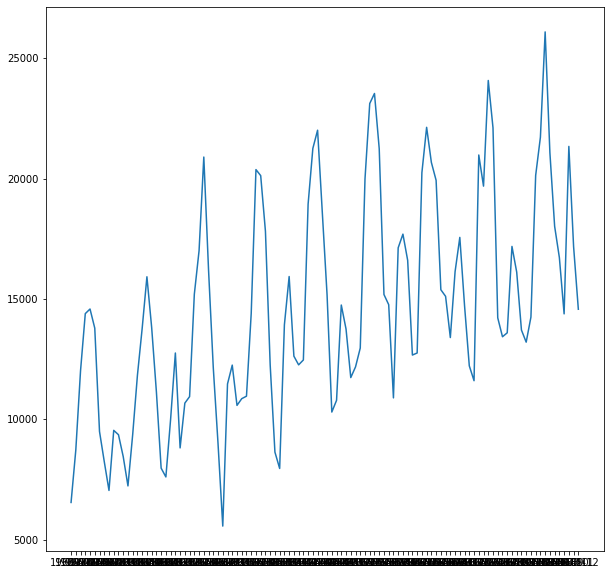

In [37]:
plt.figure(figsize=(10,10))
plt.plot(serie)
plt.show()

In [38]:
data = serie.values

Preparar los datos para un problema supervisado

In [186]:
def series_to_supervised(data, n_in, n_out=1):
  df = pd.DataFrame(data)
  cols = list()
  # serie de entrada: (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
  # serie de predicción: (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
  # concatenar datos
  agg = pd.concat(cols, axis=1)
  # quitar valores vacíos
  agg.dropna(inplace=True)
  return agg.values

In [200]:
def series_to_supervised(data, n_in, n_out=1):
  df = pd.DataFrame(data)
  # serie de entrada: (t-n, ... t-1)
  cols=[df.shift(-i) for i in range(0,n_in, 1)]
  # serie de predicción: (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-(n_in+i)))
  # concatenar datos
  agg = pd.concat(cols, axis=1)
  # quitar valores vacíos
  agg.dropna(inplace=True)
  return agg.values

In [201]:
n_input=12
data_transform=series_to_supervised(data, n_input)

In [202]:
data_transform

array([[ 6550.,  8728., 12026., ...,  9364.,  8456.,  7237.],
       [ 8728., 12026., 14395., ...,  8456.,  7237.,  9374.],
       [12026., 14395., 14587., ...,  7237.,  9374., 11837.],
       ...,
       [17187., 16119., 13713., ..., 16722., 14385., 21342.],
       [16119., 13713., 13210., ..., 14385., 21342., 17180.],
       [13713., 13210., 14251., ..., 21342., 17180., 14577.]])

Dividiendo en entrenamiento y prueba (dejando los 12 últimos meses de prueba)

In [203]:
n_test = 12

In [204]:
train_data,test_data= data_transform[:-n_test], data_transform[-n_test:]

In [205]:
x_train, y_train = train_data[:, :-1], train_data[:, -1]

In [206]:
x_test, y_test = test_data[:, :-1], test_data[:, -1]

In [207]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(2048,), random_state=1,max_iter=1000)

In [127]:
mlp.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2048,), max_iter=1000,
              random_state=1)

In [128]:
y_pred=mlp.predict(x_test)

In [129]:
for t, p in zip(y_test, y_pred):
  print(t, p, t-p)

13210.0 12225.0 985.0
14251.0 10947.0 3304.0
20139.0 20985.0 -846.0
21725.0 23125.0 -1400.0
26099.0 23541.0 2558.0
21084.0 19933.0 1151.0
18024.0 12268.0 5756.0
16722.0 13434.0 3288.0
14385.0 13401.0 984.0
21342.0 16135.0 5207.0
17180.0 17697.0 -517.0
14577.0 14720.0 -143.0


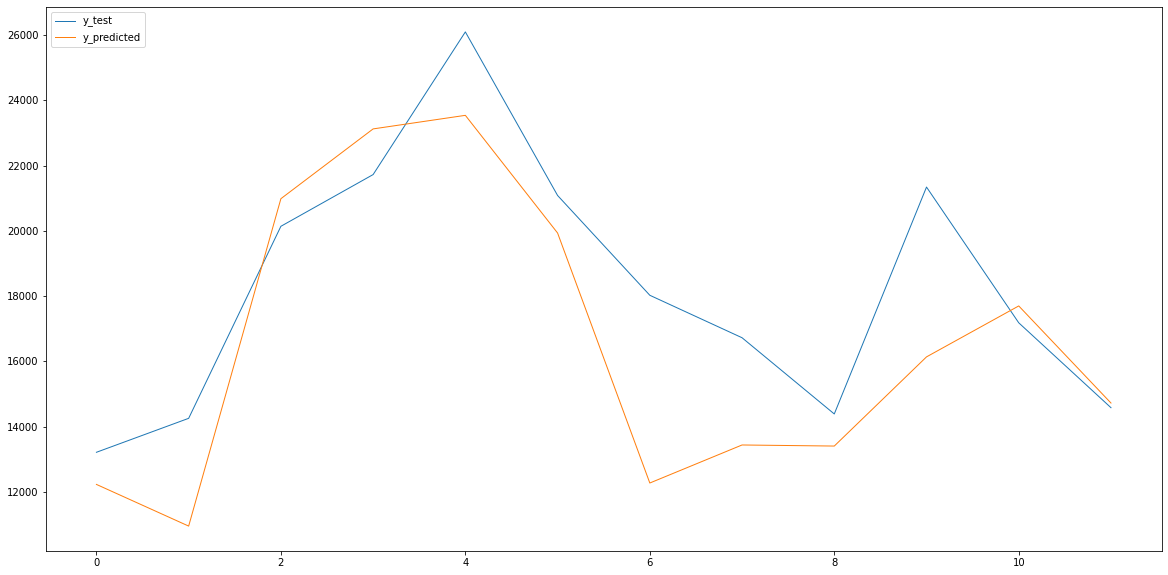

In [130]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='y_test',linewidth=1)
plt.plot(y_pred, label='y_predicted',linewidth=1)
plt.legend(loc='upper left')
plt.show()

In [131]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % rmse)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print('MAE: %.2f' % mae)
print('R2: %.2f' % r2)

RMSE: 2809.83
MAE: 2178.25
R2: 0.44


In [144]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [145]:
model.fit(x_train, y_train, epochs=200, batch_size=100)

Epoch 1/200
1/1 [==============================] - 0s 389ms/step - loss: 561953536.0000
Epoch 2/200
1/1 [==============================] - 0s 21ms/step - loss: 346222816.0000
Epoch 3/200
1/1 [==============================] - 0s 25ms/step - loss: 186115904.0000
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 79422608.0000
Epoch 5/200
1/1 [==============================] - 0s 24ms/step - loss: 22565832.0000
Epoch 6/200
1/1 [==============================] - 0s 15ms/step - loss: 8961276.0000
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 26666274.0000
Epoch 8/200
1/1 [==============================] - 0s 16ms/step - loss: 57103296.0000
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 82449112.0000
Epoch 10/200
1/1 [==============================] - 0s 14ms/step - loss: 94098848.0000
Epoch 11/200
1/1 [==============================] - 0s 12ms/step - loss: 91681968.0000
Epoch 12/200
1/1 [==============================]

In [146]:
predictions=model.predict(x_test)

In [150]:
y_predict=predictions.flatten()

In [151]:
for t, p in zip(y_test, y_predict):
  print(t, p, t-p)

13210.0 13123.826 86.173828125
14251.0 14221.333 29.6669921875
20139.0 20147.47 -8.470703125
21725.0 23743.951 -2018.951171875
26099.0 24026.14 2072.859375
21084.0 21900.639 -816.638671875
18024.0 16730.451 1293.548828125
16722.0 15083.118 1638.8818359375
14385.0 15861.63 -1476.6298828125
21342.0 18064.568 3277.431640625
17180.0 18806.844 -1626.84375
14577.0 15365.409 -788.4091796875


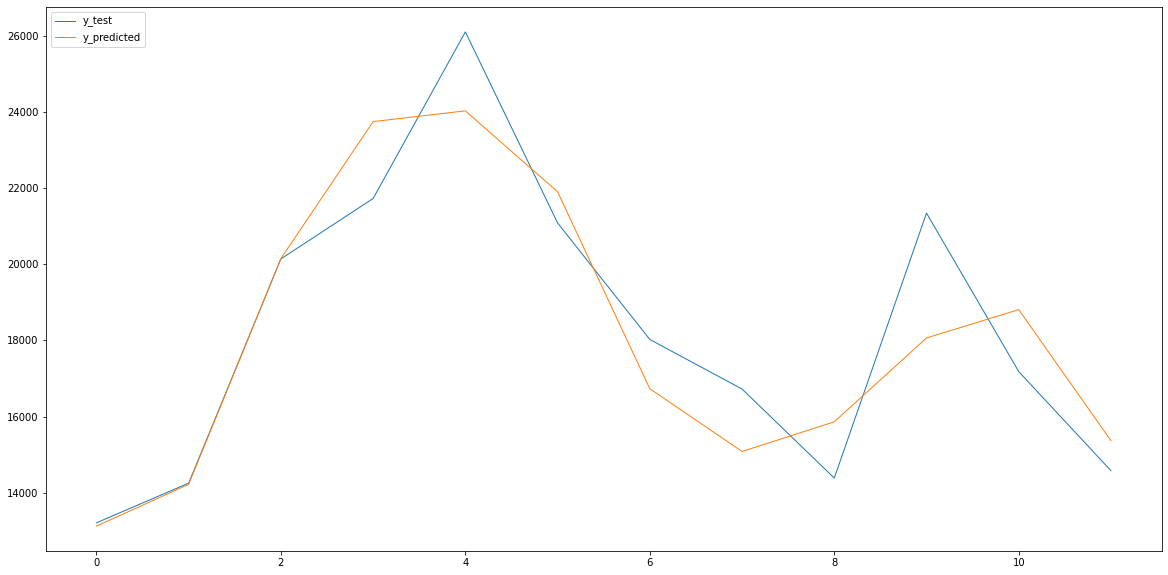

In [152]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='y_test',linewidth=1)
plt.plot(predictions, label='y_predicted',linewidth=1)
plt.legend(loc='upper left')
plt.show()

In [208]:
import plotly.express as px

In [216]:
test=serie.iloc[-n_test:,:]
test

,Sales
Month,
1968-01,13210
1968-02,14251
1968-03,20139
1968-04,21725
1968-05,26099
1968-06,21084
1968-07,18024
1968-08,16722
1968-09,14385


In [229]:
test['Predict']=predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [230]:
test

,Sales,Predict
Month,,
1968-01,13210,13123.826172
1968-02,14251,14221.333008
1968-03,20139,20147.470703
1968-04,21725,23743.951172
1968-05,26099,24026.140625
1968-06,21084,21900.638672
1968-07,18024,16730.451172
1968-08,16722,15083.118164
1968-09,14385,15861.629883


In [222]:
fig = px.line(test, x=test.index, y=["Sales", "Predict"], template = 'plotly_dark')
fig.show()

In [223]:
train=serie.iloc[:-n_test,:]

In [227]:
train['Predict']=None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [235]:
all_data=pd.concat([train, test])
all_data

,Sales,Predict
Month,,
1960-01,6550,NaN
1960-02,8728,NaN
1960-03,12026,NaN
1960-04,14395,NaN
1960-05,14587,NaN
...,...,...
1968-08,16722,15083.118164
1968-09,14385,15861.629883
1968-10,21342,18064.568359


In [236]:
fig = px.line(all_data, x=all_data.index, y=["Sales", "Predict"], template = 'plotly_dark')
fig.show()

## Estimar métricas

In [155]:
# estimar el error de predicción
rmse = sqrt(mean_squared_error(y_test, y_predict))
print('RMSE: %.2f' % rmse)
r2 = r2_score(y_test, y_predict)
mae=mean_absolute_error(y_test, y_predict)
print('MAE: %.2f' % mae)
print('R2: %.2f' % r2)


RMSE: 1570.50
MAE: 1261.21
R2: 0.82
